# Projeto 3 - Ciência dos Dados

#  Projeto UFC

Nome: Victor Vergara Arcoverde de Albuquerque Cavalcanti

Nome: Edgard Neto

Nome: Gabriel Yamashita

Nome: Henrique Mualem Marti



  ___
## Objetivo:

### O objetivo desse projeto é fazer um machine learning para poder prever qual lutador ganhará uma luta do UFC baseado no seu histórico. Para isso serão usados os dados de todas as lutas do UFC (mais de 5 mil) a fim de descobrir quais os fatores dos lutadores que impactam mais no resultado das lutas. 

[Database utilizado](https://www.kaggle.com/rajeevw/ufcdata#data.csv)

____
## Método escolhido:

### Random Forest:
# ESPLICAR CADA UM

### Regressão Logística:

 ___
## Preparando o ambiente no jupyter:

___
### Imports:

In [8]:
import math
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import random
import statsmodels.api as sm
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

___
### Trabalhando com os Excels:

In [9]:
data = pd.read_excel("data.xlsx")
data2 = data
data.head(2)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0,...,2,0,0,8,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0,...,0,2,0,5,Southpaw,165.10,167.64,125.0,32.0,31.0


In [10]:
data.weight_class = data.weight_class.astype('category')
data.Winner = data.Winner.astype('category')

In [11]:
data.Winner.value_counts()

Red     3470
Blue    1591
Draw      83
Name: Winner, dtype: int64

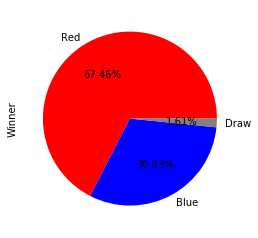

In [36]:
data.Winner.value_counts().plot.pie(colors = ['red', 'blue', 'grey'] )

In [ ]:
data_heavy = data.loc[(data.weight_class=='Heavyweight'),:]
bool_to_number = {False: 0, True: 1}
string_to_number = {'Blue': 0, 'Red': 1, 'Draw': 2}
data_heavy['title_bout'] = data_heavy['title_bout'].map(bool_to_number)
data_heavy['Winner'] = data_heavy['Winner'].map(string_to_number)

#### Blue = 0
#### Red = 1

In [ ]:
data_heavy.head(2)

In [ ]:
data_heavy_util = data_heavy.drop(['Referee','date','location'], axis=1)
#dados que não se relacionam com os lutadores ou seus resultado

In [ ]:
data_heavy_util.head(2)

In [ ]:
data_heavy_util.dropna(inplace=True)
data_heavy_util.head(2)

___
### Tirando os dados categóricos:

In [ ]:
categoricas = [
    'R_fighter', 
    'B_fighter', 
    'weight_class', 
    'R_Stance', 
    'B_Stance', 
]

data_heavy_cat = data_heavy_util[categoricas].astype('category')
data_heavy_num = data_heavy_util.drop(categoricas, axis=1).astype('float')

## Teste temporário   ARRUMAR DEPOIS

In [ ]:
teste_x=data_heavy_num.loc[:,['B_current_lose_streak','B_current_win_streak','R_current_lose_streak','R_current_win_streak']]
teste_y=data_heavy_num['Winner']

In [ ]:
X_Train, X_Test, y_Train, y_Test = train_test_split(teste_x, teste_y, test_size=0.25)
model = RandomForestClassifier(n_estimators=10000)

model.fit(X_Train, y_Train)
y_Pred = model.predict(X_Test)

print(accuracy_score(y_Test, y_Pred))

___
# Teste 1 - Random Forest

In [ ]:
X = data_heavy_num.drop('Winner', axis=1)
y = data_heavy_num['Winner']

## Separando os dados em testes e treinamento

In [ ]:
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X, y, test_size=0.25)

___
## Montando modelo Random Forest

In [ ]:
model_random = RandomForestClassifier(n_estimators=10000)

model_random.fit(X_train_random, y_train_random)

___
## Verificando a performance


In [ ]:
X_train_random.columns

In [ ]:
model_random.feature_importances_

In [ ]:
y_pred_random = model_random.predict(X_test_random)

In [ ]:
print(accuracy_score(y_test_random, y_pred_random))

In [ ]:
y_pred_random

In [ ]:
y_test_random.value_counts(True)

In [ ]:
data_heavy_num.Winner.value_counts()

   ___
## Conclusão do Modelo inicial Random Forest:

Tendo um acurácia de 0.6667 não é um bom resultado, visto que o modelo praticamente sempre tem como resultado o vermelho como vencedor, e como a probabilidade do lutador vermelho ganhar é de 0.6212112 ele praticamente só acerta os que o vencedor é o vermelho e erra os que o azul é o vencedor.

Assim é possível concluir que é necessário desconsiderar algumas variáveis para melhorar a acurácia.

   ___
## Criando um dataframe dos fatores mais impactantes no resultado segundo o teste acima:

In [ ]:
#Fatores que tem o maior peso na decisão da vitória
j=1
lista_j=list()
for i, f in sorted(list(zip(model_random.feature_importances_, X_train_random.columns)), reverse=True):
    a=str(j)+'°'
    lista_j.append(a)
    j+=1

In [ ]:
data={'Fator':X_train_random.columns ,'Correlação':model_random.feature_importances_,}
Fator_por_corr=pd.DataFrame(data)
Fator_por_corr=Fator_por_corr.sort_values(by='Correlação', ascending=False)
Fator_por_corr['Grau de Importância']=lista_j
Fator_por_corr = Fator_por_corr.set_index('Grau de Importância')
Fator_por_corr.head(2)

In [ ]:
data_heavy_util_relevante = data_heavy_util.loc[:,uteis]
data_heavy_util_relevante.head(2)

   ___
## Escolhendo quais dados devem ser usados nos modelos de predição:

In [ ]:
def relevancia(df,coluna_nome,coluna_correlacao,acuracia):
    inuteis = []
    uteis = ['Winner']
    for index,row in df.iterrows():
        if row[coluna_correlacao] >= -acuracia and row[coluna_correlacao] <= acuracia:
            inuteis.append(row[coluna_nome])
        else:
            uteis.append(row[coluna_nome])
    return uteis

In [ ]:
uteis = relevancia(Fator_por_corr,'Fator','Correlação',0.01)

In [ ]:
data_heavy_util_relevante = data_heavy_util.loc[:,uteis]
data_heavy_util_relevante.head()

___
# Teste 2- Regressão Logística

___
## Montando a Regressão Logística


## !Ainda é necessário tirar os fatores que foram julgados ter um baixo grau de importância pelo teste anterior!

In [ ]:
def preparo(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp,missing='drop')
    results = model.fit()
    return results

In [ ]:
Y_log = data_heavy_util_relevante["Winner"]
data_heavy_sem_Winner=data_heavy_util_relevante.drop('Winner',axis=1) 
X_log=data_heavy_sem_Winner
#np.asarray(X)

In [ ]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, Y_log, test_size=0.25)

In [ ]:
model = LogisticRegression(max_iter=200000,solver='lbfgs', multi_class='auto')

model.fit(X_train_log, y_train_log)

In [ ]:
y_pred_log = model.predict(X_test_log)

In [ ]:
print(accuracy_score(y_test_log, y_pred_log))

In [ ]:
y_pred_log

In [ ]:
y_test_log.value_counts(True)

In [ ]:
data_heavy_util_relevante.Winner.value_counts()

In [ ]:
result = preparo(X_log,Y_log)
result.summary()

____
## Predição do modelo

___
## Conclusão

   ___
## Aperfeiçoamento:


   ___
## Referências

[Como usar a biblioteca Scikit-lear](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

[Como funciona o Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

[Referencia do Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[Como funciona regressão linear](https://www.saedsayad.com/logistic_regression.htm)

[Como usar a Regressão Linear](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)



In [ ]:
#criando um novo dataframe
lista_locB = ["B_fighter", "weight_class","B_Height_cms","B_Reach_cms","B_Weight_lbs","B_age"]
lista_locR = ["R_fighter", "weight_class","R_Height_cms","R_Reach_cms","R_Weight_lbs","R_age"]
data_red = data2.loc[: , lista_locR]
data_blue = data2.loc[: , lista_locB]

data_blue.columns = ["Fighter","Weight_class","Height_cms","Reach_cms","Weight_lbs","Age"]
data_red.columns = ["Fighter","Weight_class","Height_cms","Reach_cms","Weight_lbs","Age"]

data_red.head(2)

In [ ]:
newdataR = pd.DataFrame()


namelist = []

for n in range(0,5143):
    if data_red.loc[n,:]["Fighter"] not in namelist:
        namelist.append(data_red.loc[n,:]["Fighter"])
        newdataR = pd.concat([newdataR,data_red.loc[n,:]], axis=1, join='outer')

newdataR = newdataR.transpose()

newdataR.head(2)

In [ ]:
newdataB = pd.DataFrame()

namelist = []

for n in range(0,5143):
    if data_blue.loc[n,:]["Fighter"] not in namelist:
        namelist.append(data_blue.loc[n,:]["Fighter"])
        newdataB = pd.concat([newdataB,data_blue.loc[n,:]], axis=1, join='outer')

newdataB = newdataB.transpose()

newdataB.head(2)

In [ ]:
newdata = pd.concat([newdataB, newdataR], axis=0, join='outer', ignore_index=False, keys=None,levels=None, names=None, verify_integrity=False, copy=True)
newdata = newdata.set_index("Fighter")

newdata.head(2)